<a href="https://colab.research.google.com/github/tferdous17/CSC467_Week2_Lab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC467 Computer Vision and Pattern Recognition

### Lab 2 - Basic Image Processing

### Tasnim Ferdous

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from skimage import io as io_url

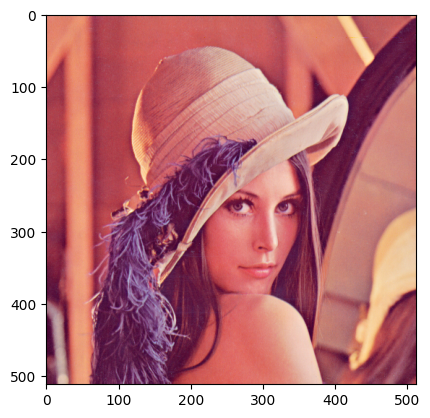

In [49]:
frame = io_url.imread("https://raw.githubusercontent.com/tferdous17/CSC467_Week2_Lab/refs/heads/main/Lena.png")
frame = np.float32(frame) / 255

plt.imshow(frame)

In [50]:
print(frame.shape)

(512, 512, 3)


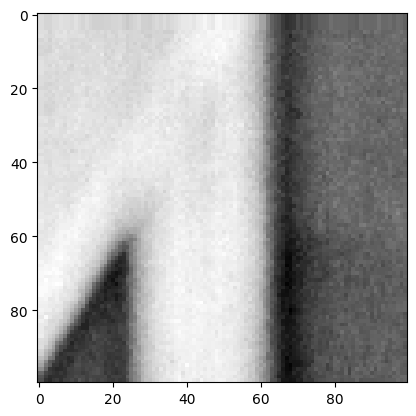

In [51]:
frm = frame[0:100, 0:100, 0]
plt.imshow(frm, cmap='gray')

Before: [[0.8862745 0.8862745 0.8745098 0.8745098 0.8862745]
 [0.8862745 0.8862745 0.8745098 0.8745098 0.8862745]
 [0.8862745 0.8862745 0.8745098 0.8745098 0.8862745]
 [0.8862745 0.8862745 0.8745098 0.8745098 0.8862745]
 [0.8862745 0.8862745 0.8745098 0.8745098 0.8862745]]
After: [[20.886274 20.886274 20.87451  20.87451  20.886274]
 [20.886274 20.886274 20.87451  20.87451  20.886274]
 [20.886274 20.886274 20.87451  20.87451  20.886274]
 [20.886274 20.886274 20.87451  20.87451  20.886274]
 [20.886274 20.886274 20.87451  20.87451  20.886274]]


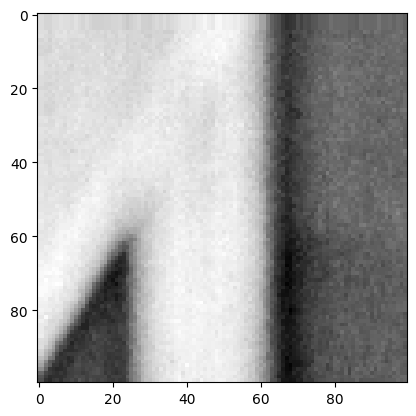

In [52]:
new_arr = frm + 20
plt.imshow(new_arr, cmap='gray')

# New image wasn't showing a difference in brightness so I printed the values
# to prove the values in frm were actually modified
print("Before:", frame[0:5, 0:5, 0])
print("After:", new_arr[0:5, 0:5])

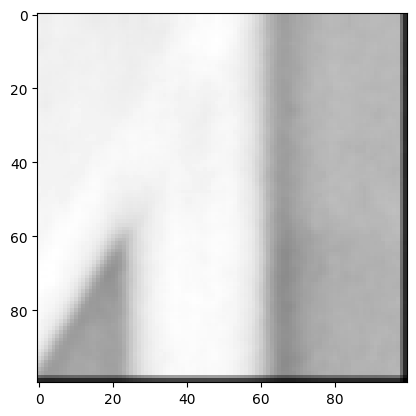

In [53]:
# Mean Filter w/ 3x3 convolution

kernel_size = 3
height = frm.shape[0]
width = frm.shape[1]
output = np.zeros((height, width))

for i in range(height):
  for j in range(width):
    kernel_region = frm[i:i+kernel_size, j:j+kernel_size]
    matrix_sum = sum(sum(row) for row in kernel_region)
    mean = matrix_sum / (kernel_size * kernel_size)
    output[i, j] = mean

plt.imshow(output, cmap='gray')

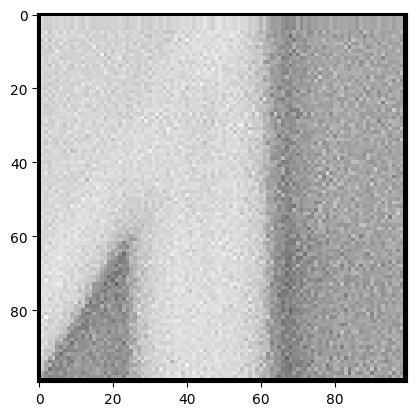

In [54]:
# Sharpening Filter w/ 3x3 convolution

kernel = [
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0],
]

height = frm.shape[0]
width = frm.shape[1]
output = np.zeros((height, width))

for i in range(1, height -1):
  for j in range(1, width -1):
    kernel_region = frm[i-1:i+kernel_size, j-1:j+kernel_size]
    res = 0

    for x in range(3):
      for y in range(3):
        res += kernel_region[x, y] * kernel[x][y]

    output[i, j] = res

plt.imshow(output, cmap='gray')

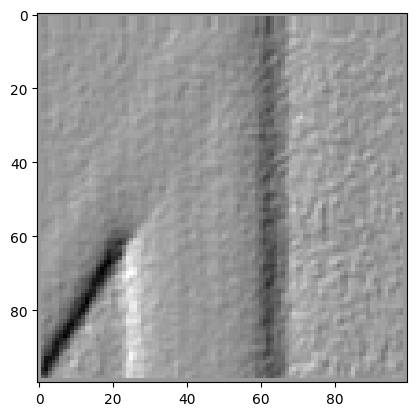

In [55]:
# I didnt see edge dection algorithms in the week 2 slides so I looked up popular
# ones for this lab implementation
sobel_x = [
    [-1, 0, +1],
    [-2, 0, +2],
    [-1, 0, +1]
]

sobel_y = [
    [-1, -2, -1],
    [ 0,  0,  0],
    [+1, +2, +1]
]

height = frm.shape[0]
width = frm.shape[1]
output = np.zeros((height, width))

for i in range(1, height -1):
  for j in range(1, width -1):
    kernel_region = frm[i-1:i+kernel_size, j-1:j+kernel_size]
    res = 0

    for x in range(3):
      for y in range(3):
        res += kernel_region[x, y] * sobel_x[x][y]
        res += kernel_region[x, y] * sobel_y[x][y]

    output[i, j] = res

plt.imshow(output, cmap='gray')